<a href="https://colab.research.google.com/github/ydg06081/ahapu/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_202213749_%EC%9C%A4%EB%8F%99%EA%B1%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

비트코인의 시세를 가지고 여러가지 분석을 할 예정입니다.

컴퓨터에서 파일을 못찾는 오류가 발생하여서 구글 콜랩에서 제공하는 기능을 이용하여 파일을 업로드 하였습니다.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# 업로드한 파일의 이름을 변수에 저장
file_name = list(uploaded.keys())[0]

# 엑셀 파일 읽기
df = pd.read_csv(file_name)

# DataFrame 출력
print(df)


Saving BTC-USD.csv to BTC-USD (2).csv
           Date          Open          High           Low         Close  \
0    2022-12-22  16818.380859  16866.673828  16592.408203  16830.341797   
1    2022-12-23  16829.644531  16905.218750  16794.458984  16796.953125   
2    2022-12-24  16796.976563  16864.703125  16793.527344  16847.755859   
3    2022-12-25  16847.505859  16860.554688  16755.253906  16841.986328   
4    2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688   
..          ...           ...           ...           ...           ...   
361  2023-12-18  41348.203125  42720.296875  40530.257813  42623.539063   
362  2023-12-19  42641.511719  43354.296875  41826.335938  42270.527344   
363  2023-12-20  42261.300781  44275.585938  42223.816406  43652.250000   
364  2023-12-21  43648.125000  44240.667969  43330.050781  43869.152344   
365  2023-12-22  43868.988281  44367.957031  43522.386719  43755.042969   

        Adj Close       Volume  
0    16830.341797  164415730

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-22,16818.380859,16866.673828,16592.408203,16830.341797,16830.341797,16441573050
1,2022-12-23,16829.644531,16905.218750,16794.458984,16796.953125,16796.953125,15329265213
2,2022-12-24,16796.976563,16864.703125,16793.527344,16847.755859,16847.755859,9744636213
3,2022-12-25,16847.505859,16860.554688,16755.253906,16841.986328,16841.986328,11656379938
4,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804


업로드한 데이터셋을 보면 비트코인을
Date(날짜), Open(시가), High(고가), Low(저가), Close(종가), Adj Close(수정종가), Volume(거래량)으로 분류하고있습니다.

이 자료에서 제가 주목한 데이터는 Date,Volume,Close,High,Low입니다.
1.날짜와 종가의 관계
2.날짜와 볼륨과의 관계
3.종가와 볼륨과의 관계
위 3가지를 분석하여  향후 비트코인의 가격을 예측해보는 모델을 만드려고 합니다.



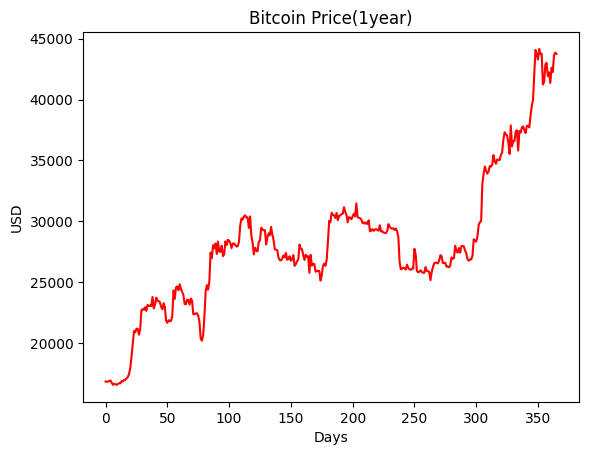

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = df.copy(deep = True)
usd = df1[['Close']].to_numpy()
plt.plot(usd, color = 'r')
plt.title('Bitcoin Price(1year)')
plt.xlabel('Days')
plt.ylabel('USD')
plt.show()

최근 1년 즉 22년12-22~23년 12-22일 까지의 비트코인의 가격그래프입니다.현재 22년 기준으로 우상향하는 움직임을 볼 수 있습니다.

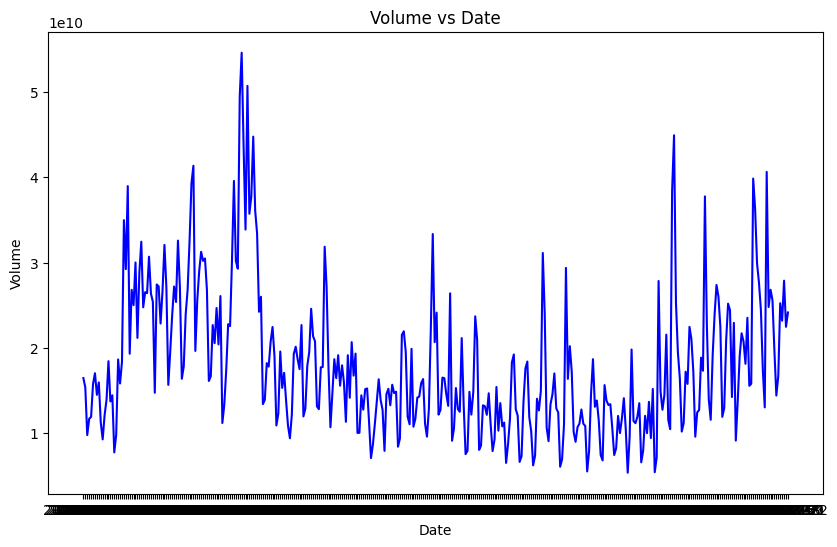

In [35]:
df2 = df.copy(deep = True)
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Volume'],color='b')
plt.title('Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

비트코인의 Date에따른 볼륨 변화를 그래프로 확인할 수 있습니다.
가격 변화의 동향을 보면 현재는 이전의 볼륨보다는 그리 높은 위치는 아닌걸로 보입니다. 직관적인 예측으로는 큰 이변이 있지 않은 이상 거래량이 더 올라갈 가능성이 있다고 보여집니다.

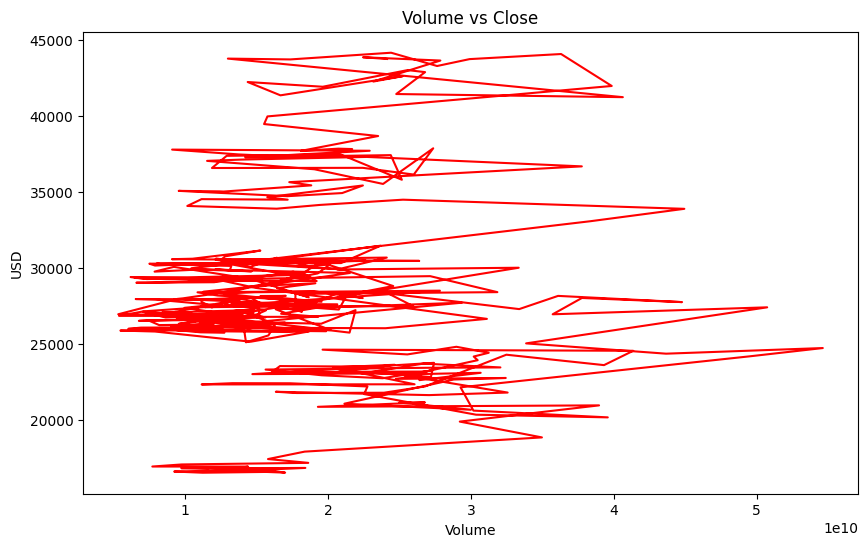

In [36]:
df3=df.copy(deep=True)
plt.figure(figsize=(10, 6))
plt.plot(df2['Volume'], df2['Close'],color='r')
plt.title('Volume vs Close')
plt.xlabel('Volume')
plt.ylabel('USD')
plt.show()

위 그래프는 볼륨에따른 종가를 분석한 결과입니다.굉장히 기괴한 그래프를 보여줍니다.즉 "볼륨과 가격은 정비례 하지않다"라는 결론을 얻을 수 있습니다.
그래서 가격을 예측할 수 있는 모델을 설계하여 사람이 예측하기 힘든 결과를 도출해보도록 하겠습니다.

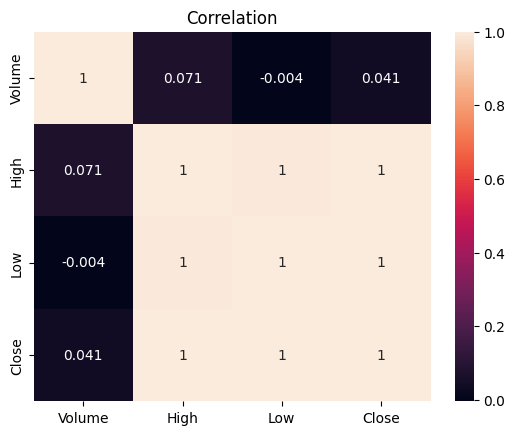

In [37]:
import matplotlib.ticker as mticker
import seaborn as sns
df4 = df.copy(deep=True)
# Correlation analysis
correlation_matrix = df4[['Volume', 'High', 'Low', 'Close']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation")
plt.show()

추가적으로 거래량,고가,저가,종가의 상관분석을 진행 하였습니다.그래도 거래량과 종가,거래량과 고가는 어느정도 상관이 있다는걸 알 수 있습니다.

금융 데이터는 시계열 데이터로서 이는 시간에 따라 변하는 동적인 데이터 입니다.
이러한 시계열 데이터는 다른 데이터와 다르게 한 번에 모든 정보를 입력(학습) 받으면 유의미한 결과를 얻기 어렵습니다.

즉 데이터의 순서(시간)가 중요하며, 이전의 있었던 순차적인 정보를 통해 향후의 사건을 예측한다고 볼 수 있습니다.

Epoch 1/200
200/200 [==============================] - 3s 8ms/step - loss: 4100.1343 - mae: 4100.1343 - val_loss: 1430.1328 - val_mae: 1430.1328
Epoch 2/200
200/200 [==============================] - 1s 6ms/step - loss: 2641.9053 - mae: 2641.9053 - val_loss: 638.5602 - val_mae: 638.5602
Epoch 3/200
200/200 [==============================] - 1s 6ms/step - loss: 1713.2795 - mae: 1713.2795 - val_loss: 1152.5609 - val_mae: 1152.5609
Epoch 4/200
200/200 [==============================] - 1s 6ms/step - loss: 1628.6647 - mae: 1628.6647 - val_loss: 1728.3774 - val_mae: 1728.3774
Epoch 5/200
200/200 [==============================] - 1s 6ms/step - loss: 1566.2806 - mae: 1566.2806 - val_loss: 3342.8040 - val_mae: 3342.8040
Epoch 6/200
200/200 [==============================] - 1s 7ms/step - loss: 1785.8335 - mae: 1785.8335 - val_loss: 689.3732 - val_mae: 689.3732
Epoch 7/200
200/200 [==============================] - 2s 8ms/step - loss: 1714.1790 - mae: 1714.1790 - val_loss: 2897.2776 - val_mae:

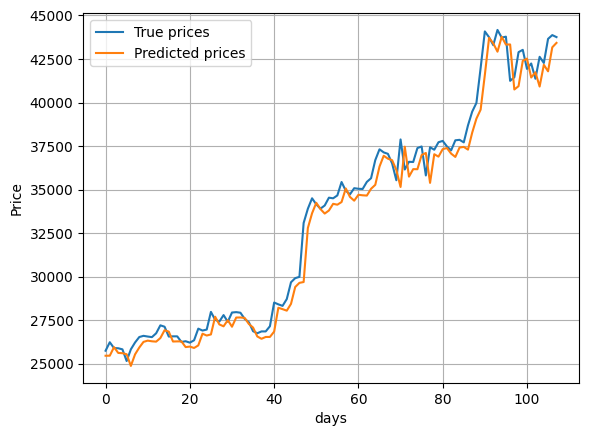

In [40]:
df6 = df.copy(deep=True)
seq = df6[['Close']].to_numpy()
def seq2dataset(seq, window, horizon):
    X = []
    Y = []

    for i in range(len(seq) - (window+horizon)+1):
        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

w = 7 #- window size 일정길이로 자른 데이터
h = 1 #- horizon factor 하루 뒤의 가격 예측

X ,Y = seq2dataset(seq, w, h) #- w, h에 따라 데이터셋 재구성
#훈련데이터구분
split = int(len(X)*0.7)
x_train = X[0:split]
y_train = Y[0:split]
x_test=X[split:]
y_test=Y[split:]


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow import keras

model = Sequential()
model.add(LSTM(units = 128, activation = 'relu',input_shape = x_train[0].shape))
model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'mae', optimizer = opt, metrics=['mae'])
history = model.fit(x_train, y_train, epochs=200, batch_size=1, validation_split=0.2)
evaluate_value = model.evaluate(x_test, y_test, verbose=0)
print("MAE 값:", evaluate_value[1])
pred = model.predict(x_test)
print("MAPE 값:", sum(abs(y_test-pred)/y_test)/len(x_test))
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range])
plt.plot(x_range, pred[x_range])
plt.legend(['True prices', 'Predicted prices'], loc = 'best')
plt.ylabel('Price')
plt.xlabel('days')
plt.grid()
plt.show()

tensorflow API를 사용하며 LSTM알고리즘을 사용하였습니다.(모델 설계는 블로그 검색을 통한 내용을 바탕으로 작성하였습니다.)
여기서 도출되는 MAE지표는 대부분의 시계열 데이터를 통한 모델 검증으로 사용됩니다.
MAE값은 (예측값-실제값)의 평균입니다. 즉 MAE값이 작을수록
성능이 좋다고 볼 수 있습니다.
이처럼 모델설계를 통하여 비트코인 가격 예측을 해보았습니다.
h값을 1로 설정해두었기에 먼 미래는 예측을 못하였지만 애초에 주식보다 변동이 더 큰 비트코인은 이런 데이터분석이 적절하지 않습니다.
다만 수 많은 변수를 고려하기 힘들깄때문에 데이터를 가지고 분석 및 시각화 해보는 과정에 의의를 둔 프로젝트 입니다.